In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_recall_curve

In [2]:
df=pd.read_csv('Leads.csv')

In [3]:
df

Prospect ID  Lead Number  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737   
1     2a272436-5132-4136-86fa-dcc88c88f482       660728   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719   
4     3256f628-e534-4826-9d63-4a8b88782852       660681   
...                                    ...          ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9       579564   
9236  82a7005b-7196-4d56-95ce-a79f937a158d       579546   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c       579545   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9       579538   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff       579533   

                  Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  ... Get updates on DM Content    Lead Profile  \
0                     0.00  ...                        No          Select   
1                     2.50  ...                        No          Select   
2                     2.00  ...                        No  Potential Lead   
3                     1.00  ...                        No          Select   
4                     1.00  ...                        No          Select   
...                    ...  ...                       ...             ...   
9235                  2.67  ...                        No  Potential Lead   
9236                  2.00  ...                        No  Potential Lead   
9237                  2.00  ...                        No  Potential Lead   
9238                  3.00  ...                        No             NaN   
9239                  3.00  ...                        No  Potential Lead   

                    City Asymmetrique Activity Index  \
0                 Select                   02.Medium   
1                 Select                   02.Medium   
2                 Mumbai                   02.Medium   
3                 Mumbai                   02.Medium   
4                 Mumbai                   02.Medium   
...                  ...                         ...   
9235              Mumbai                   02.Medium   
9236              Mumbai                   02.Medium   
9237              Mumbai                   02.Medium   
9238  Other Metro Cities                   02.Medium   
9239        Other Cities                   02.Medium   

     Asymmetrique Profile Index Asymmetrique Activity Score  \
0                     02.Medium        

In [4]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Replacing select to null in the entire dataframe

In [6]:
df=df.replace('Select',np.nan)

# Removing the columns that has more than 30% missing values

In [7]:
round(df.isnull().sum()/len(df)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
df=df.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index',
         'Asymmetrique Activity Score','Asymmetrique Profile Score','Tags','What is your current occupation',
            'What matters most to you in choosing a course','Lead Profile','City',
            'How did you hear about X Education','Specialization','Country'],axis=1)

In [9]:
round(df.isnull().sum()/len(df)*100,2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [10]:
df.shape

(9240, 24)

In [11]:
df=df.dropna()

In [12]:
df.shape

(9074, 24)

In [13]:
round(df.isnull().sum()/len(df)*100,2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

# Removing Outliers

In [14]:
df.describe(percentiles=[.75,.80,.90,.95,.98])

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9074.000000  9074.000000  9074.000000                  9074.000000   
mean   617032.619352     0.378554     3.456028                   482.887481   
std     23348.029512     0.485053     4.858802                   545.256560   
min    579533.000000     0.000000     0.000000                     0.000000   
50%    615278.500000     0.000000     3.000000                   246.000000   
75%    637176.500000     1.000000     5.000000                   922.750000   
80%    641384.200000     1.000000     5.000000                  1078.400000   
90%    650276.800000     1.000000     7.000000                  1373.000000   
95%    655344.450000     1.000000    10.000000                  1557.000000   
98%    658475.940000     1.000000    13.000000                  1727.080000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9074.000000  
mean               2.370151  
std                2.160871  
min                0.000000  
50%                2.000000  
75%                3.200000  
80%                4.000000  
90%                5.000000  
95%                6.000000  
98%                8.000000  
max               55.000000

In [15]:
df=df[df.TotalVisits <= 13]

In [16]:
df=df[df['Page Views Per Visit'] <= 8]

In [17]:
df.describe(percentiles=[.75,.80,.90,.95,.98])

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    8804.000000  8804.000000   8804.00000                  8804.000000   
mean   617054.353476     0.377101      3.01965                   475.449455   
std     23332.370650     0.484688      2.66092                   543.421318   
min    579533.000000     0.000000      0.00000                     0.000000   
50%    615452.500000     0.000000      3.00000                   238.000000   
75%    637159.500000     1.000000      4.00000                   904.250000   
80%    641337.600000     1.000000      5.00000                  1065.400000   
90%    650262.900000     1.000000      7.00000                  1368.000000   
95%    655310.800000     1.000000      8.00000                  1552.000000   
98%    658480.340000     1.000000     10.00000                  1724.880000   
max    660737.000000     1.000000     13.00000                  2272.000000   

       Page Views Per Visit  
count           8804.000000  
mean               2.226854  
std                1.830882  
min                0.000000  
50%                2.000000  
75%                3.000000  
80%                4.000000  
90%                5.000000  
95%                6.000000  
98%                7.000000  
max                8.000000

In [18]:
df.shape

(8804, 24)

In [19]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ... X Education Forums  \
0                            0                   0.0  ...                 No   
1                          674                   2.5  ...                 No   
2                         1532                   2.0  ...                 No   
3                          305                   1.0  ...                 No   
4                         1428                   1.0  ...                 No   

  Newspaper Digital Advertisement Through Recommendations  \
0        No                    No                      No   
1        No                    No                      No   
2        No                    No                      No   
3        No                    No                      No   
4        No                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
2                                     No                                No   
3                                     No                                No   
4                                     No                                No   

  Get updates on DM Content I agree to pay the amount through cheque  \
0                        No                                       No   
1                        No                                       No   
2                        No                                       No   
3                        No                                       No   
4                        No                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 24 columns]

In [20]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

# Univariate Analysis

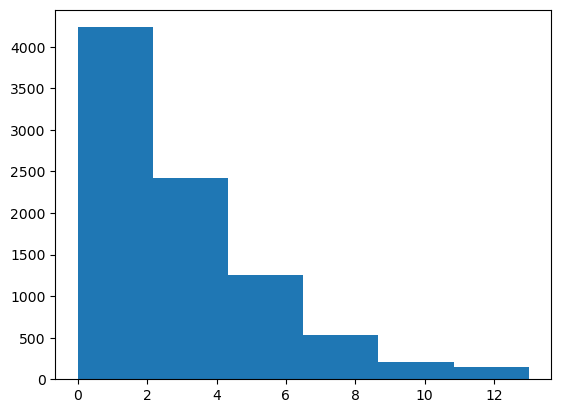

In [26]:
plt.hist(df['TotalVisits'],bins=6)
plt.show()

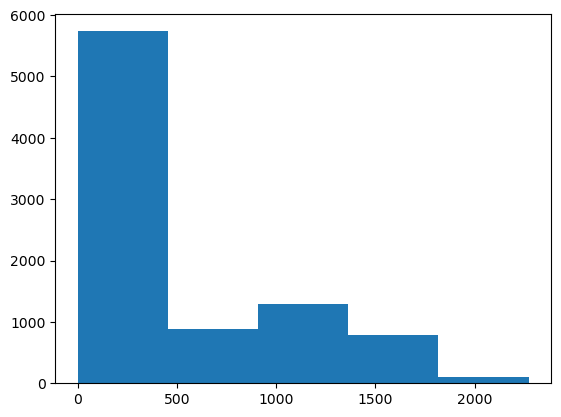

In [24]:
plt.hist(df['Total Time Spent on Website'],bins=5)
plt.show()

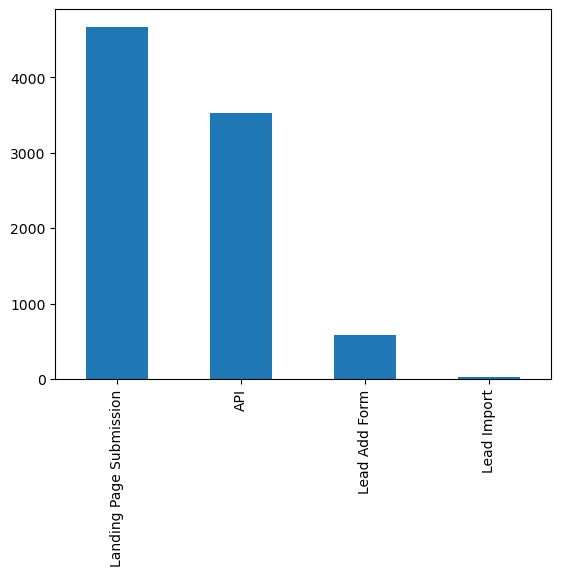

In [1407]:
df['Lead Origin'].value_counts().plot(kind='bar')
plt.show()

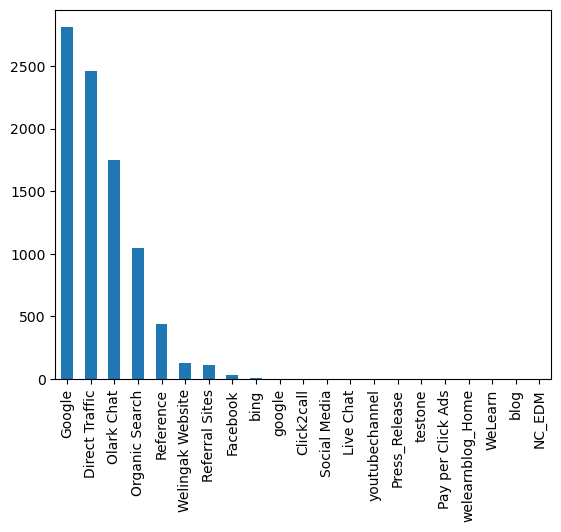

In [1408]:
df['Lead Source'].value_counts().plot(kind='bar')
plt.show()

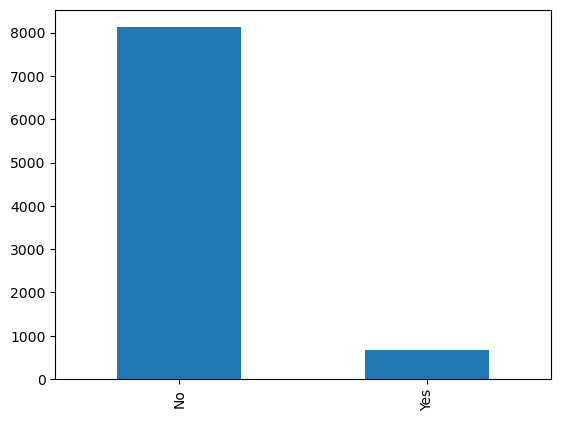

In [1409]:
df['Do Not Email'].value_counts().plot(kind='bar')
plt.show()

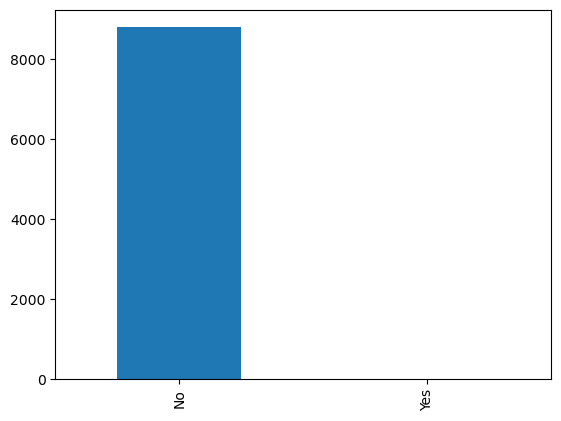

In [1410]:
df['Do Not Call'].value_counts().plot(kind='bar')
plt.show()

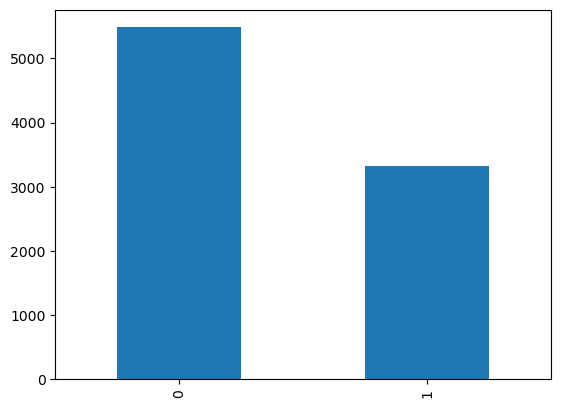

In [1411]:
df['Converted'].value_counts().plot(kind='bar')
plt.show()

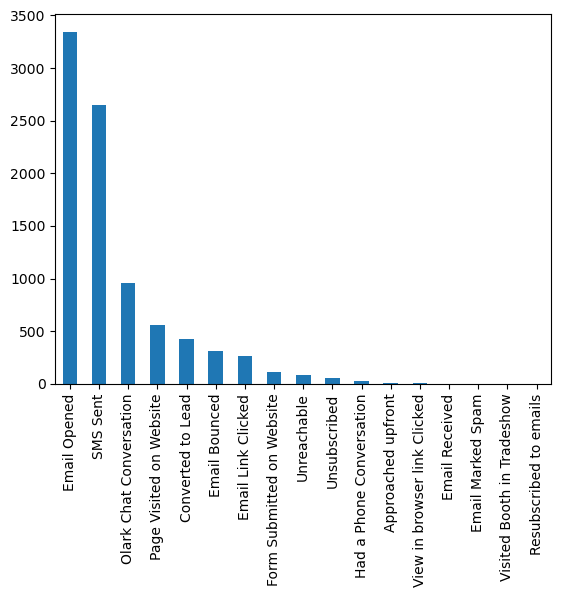

In [1412]:
df['Last Activity'].value_counts().plot(kind='bar')
plt.show()

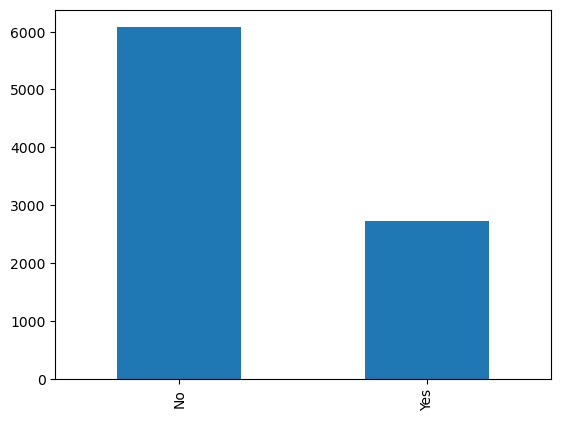

In [1413]:
df['A free copy of Mastering The Interview'].value_counts().plot(kind='bar')
plt.show()

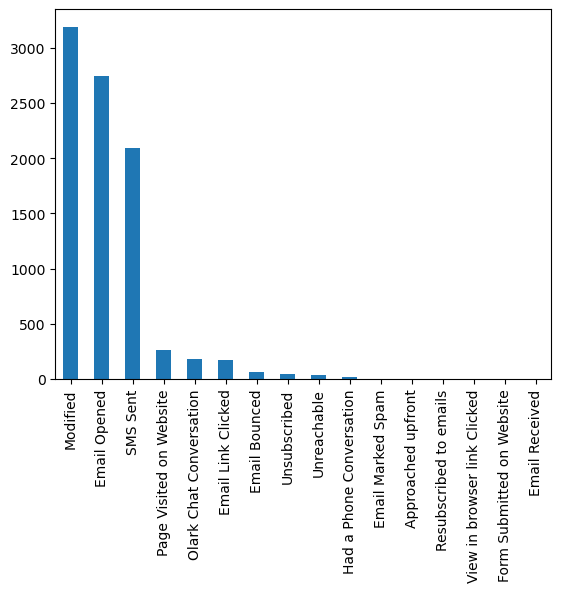

In [1414]:
df['Last Notable Activity'].value_counts().plot(kind='bar')
plt.show()

# Bivariate Analysis

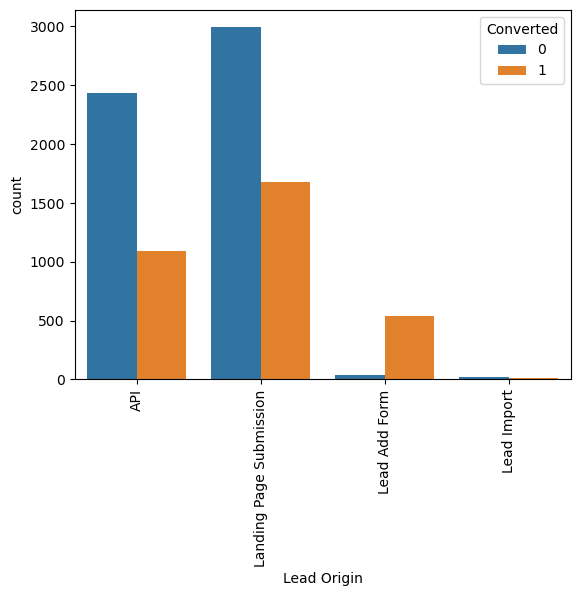

In [28]:
sns.countplot(data=df,x='Lead Origin',hue='Converted')
plt.xticks(rotation=90)
plt.show()

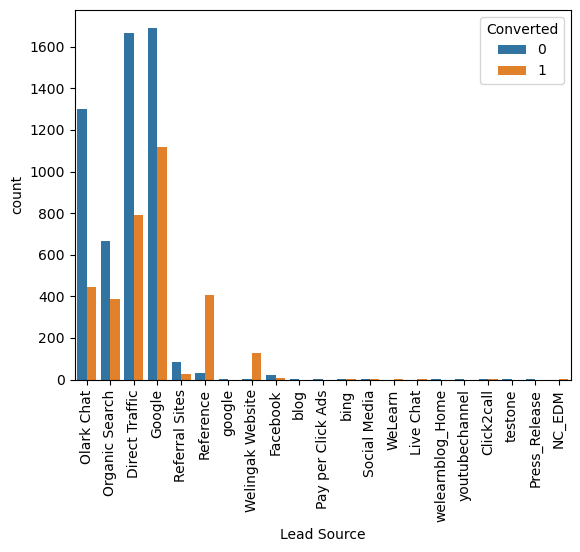

In [29]:
sns.countplot(data=df,x='Lead Source',hue='Converted')
plt.xticks(rotation=90)
plt.show()

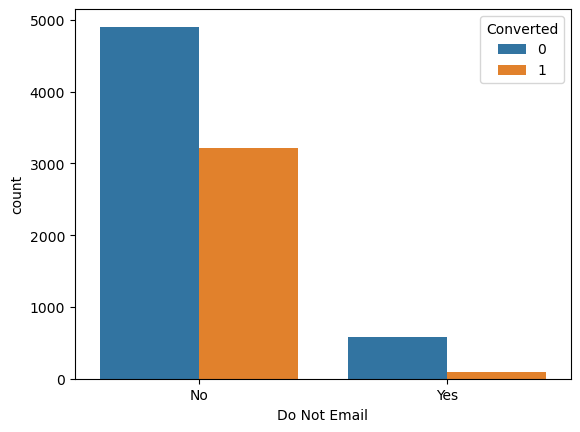

In [32]:
sns.countplot(data=df,x='Do Not Email',hue='Converted')
plt.show()

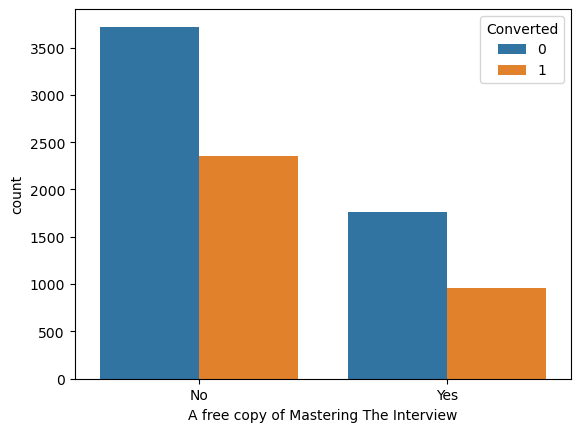

In [33]:
sns.countplot(data=df,x='A free copy of Mastering The Interview',hue='Converted')
plt.show()

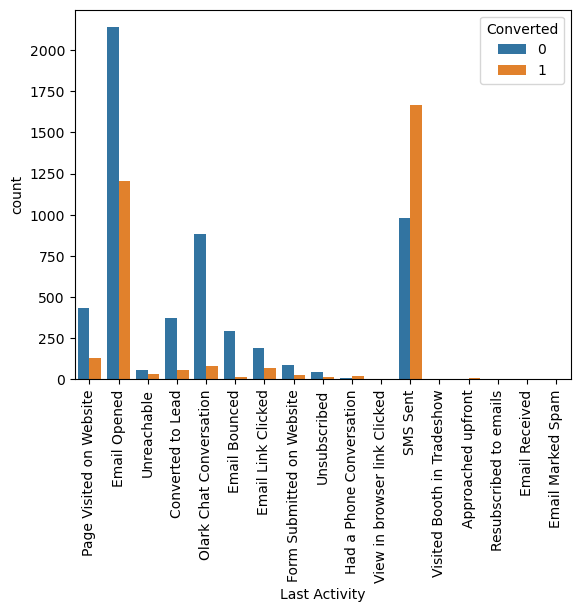

In [34]:
sns.countplot(data=df,x='Last Activity',hue='Converted')
plt.xticks(rotation=90)
plt.show()

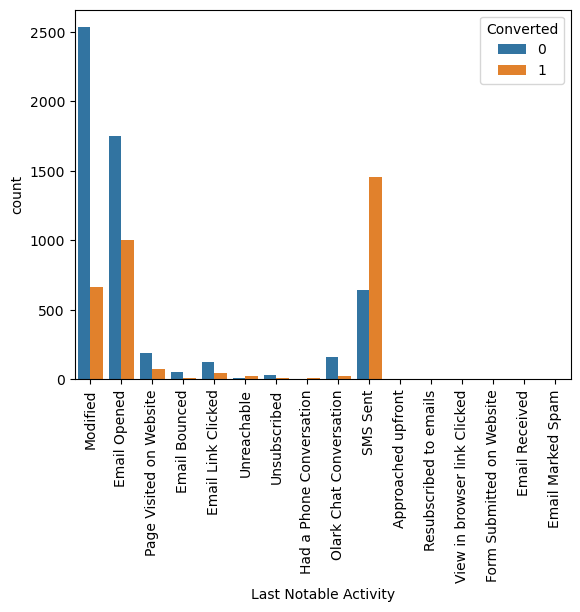

In [35]:
sns.countplot(data=df,x='Last Notable Activity',hue='Converted')
plt.xticks(rotation=90)
plt.show()

# These are the useless variables because all of them are having only no's in it

In [1415]:
df=df.drop(['Search','Magazine', 'Newspaper Article', 'X Education Forums',
            'Newspaper', 'Digital Advertisement', 'Through Recommendations',
            'Receive More Updates About Our Courses','Update me on Supply Chain Content',
            'Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [1416]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [1417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8804 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             8804 non-null   object 
 1   Lead Number                             8804 non-null   int64  
 2   Lead Origin                             8804 non-null   object 
 3   Lead Source                             8804 non-null   object 
 4   Do Not Email                            8804 non-null   object 
 5   Do Not Call                             8804 non-null   object 
 6   Converted                               8804 non-null   int64  
 7   TotalVisits                             8804 non-null   float64
 8   Total Time Spent on Website             8804 non-null   int64  
 9   Page Views Per Visit                    8804 non-null   float64
 10  Last Activity                           8804 non-null   obje

In [1418]:
df['Last Notable Activity'].value_counts()

Modified                        3193
Email Opened                    2750
SMS Sent                        2097
Page Visited on Website          262
Olark Chat Conversation          180
Email Link Clicked               168
Email Bounced                     59
Unsubscribed                      44
Unreachable                       31
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [1419]:
df['Last Activity'].value_counts()

Email Opened                    3345
SMS Sent                        2646
Olark Chat Conversation          961
Page Visited on Website          560
Converted to Lead                427
Email Bounced                    309
Email Link Clicked               262
Form Submitted on Website        111
Unreachable                       86
Unsubscribed                      58
Had a Phone Conversation          24
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [1420]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [1421]:
varlist =  ['Do Not Email', 'Do Not Call', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [1422]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified

In [1423]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [1424]:
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Last Notable Activity_Form Submitted on Website  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

  Last Notable Activity_Modified  \
0                              1   
1                              0   
2                              0   
3                              1   
4                              1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notable Activity_View in browser link Clicked  
0                                                  0   
1                                                  0   
2                                                  0   
3                                                

In [1425]:
df=df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'],axis=1)

In [1426]:
df.head()

Prospect ID  Lead Number  Do Not Email  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737             0   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728             0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727             0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719             0   
4  3256f628-e534-4826-9d63-4a8b88782852       660681             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  ...  \
0                                    0  ...   
1                                    0  ...   
2                                    1  ...   
3                                    1  ...   
4                                    1  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   Last Notabl

In [1427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8804 entries, 0 to 9239
Data columns (total 63 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Prospect ID                                         8804 non-null   object 
 1   Lead Number                                         8804 non-null   int64  
 2   Do Not Email                                        8804 non-null   int64  
 3   Do Not Call                                         8804 non-null   int64  
 4   Converted                                           8804 non-null   int64  
 5   TotalVisits                                         8804 non-null   float64
 6   Total Time Spent on Website                         8804 non-null   int64  
 7   Page Views Per Visit                                8804 non-null   float64
 8   A free copy of Mastering The Interview              8804 non-null   int64  
 9

# Train-Test split

In [1428]:
X = df.drop(['Prospect ID','Lead Number','Converted'], axis=1)

X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  ...  \
0                        0                           0  ...   
1                        0                           0  ...   
2                        0                           1  ...   
3                        0                           1  ...   
4                        0                           0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2    

In [1429]:
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1430]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Min-Max scalling

In [1431]:
scaler = MinMaxScaler()

In [1432]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
653              0            0     0.307692                     0.093750   
626              1            0     0.153846                     0.007923   
5163             0            0     0.384615                     0.178257   
8113             0            0     0.000000                     0.000000   
425              1            0     0.384615                     0.046655   

      Page Views Per Visit  A free copy of Mastering The Interview  \
653                  0.500                                       0   
626                  0.250                                       0   
5163                 0.625                                       0   
8113                 0.000                                       0   
425                  0.625                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
653                                     0                          0   
626                                     0                          0   
5163                                    0                          0   
8113                                    0                          1   
425                                     1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  ...  \
653                         0                           0  ...   
626                         0                           0  ...   
5163                        0                           0  ...   
8113                        0                           0  ...   
425                         0                           0  ...   

      Last Notable Activity_Form Submitted on Website  \
653                                                 0   
626                                                 0   
5163                                                0   
8113                                                0   
425                                                 0   

      Last Notable Activity_Had a Phone Conversation  \
653                                                0   
626                                                0   
5163                                               0   
8113                                               0   
425                                                0   

      Last Notable Activity_Modified  \
653                                1   
626                                1   
5163                               0   
8113                               1   
425                                1   

      Last Notable Activity_Olark Chat Conversation  \
653                                               0   
626                                               0   
5163                                              0   
8113                                              0   
425                                               0   

      Last Notable Activity_Page Visited on Website  \
653                                               0   
626                                               0   
5163                                              0   
8113                                              0   
425                                               0   

      Last Notable Activity_Resubscribed to emails  \
653                                              0   
626                                              0   
5163                                             0   
8113                                             0   
425                                              0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
653                                0                                  0   
626                                0                                  0   
5163                               0                                  0   
8113                               0                                  0   
425      

# Success rate

In [1433]:
(sum(df['Converted'])/len(df['Converted'].index))*100

37.71013175829169

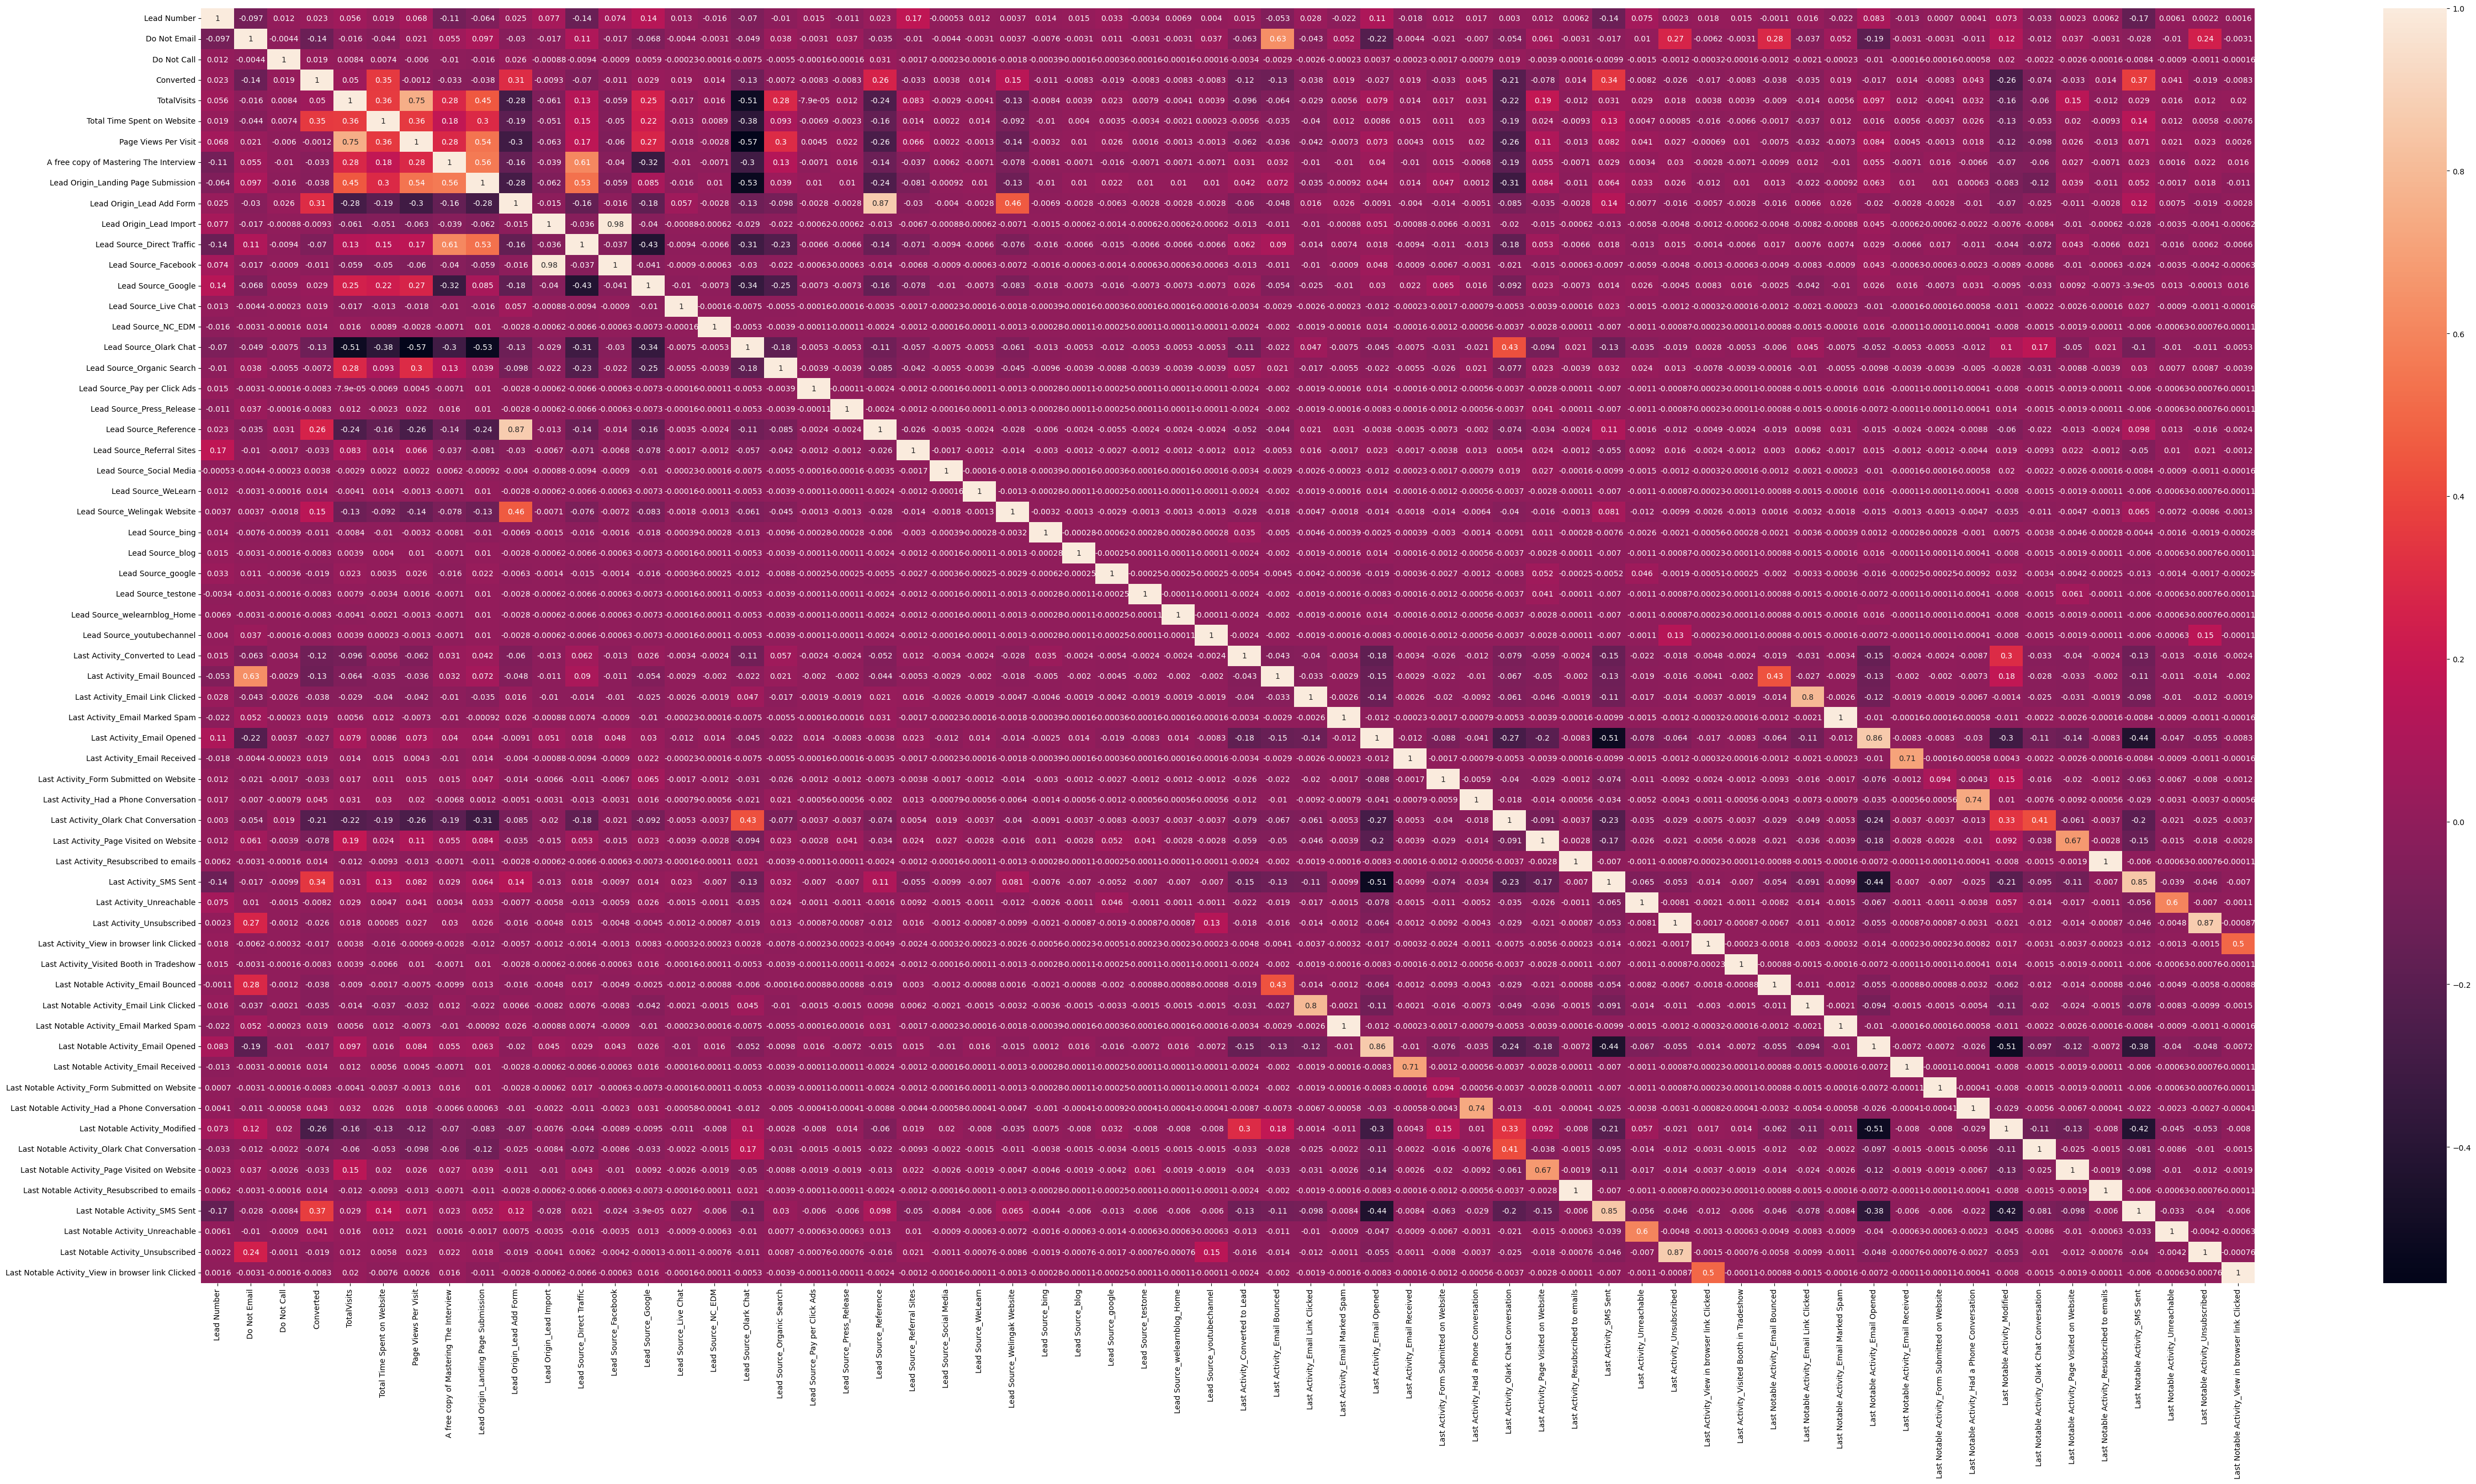

In [1434]:
plt.figure(figsize = (60,30))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [1435]:
X_train=X_train.drop(['Last Notable Activity_Modified','Last Notable Activity_Email Opened',
                      'Lead Origin_Lead Add Form','Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked'],axis=1)
X_test=X_test.drop(['Last Notable Activity_Modified','Last Notable Activity_Email Opened',
                    'Lead Origin_Lead Add Form','Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked'],axis=1)

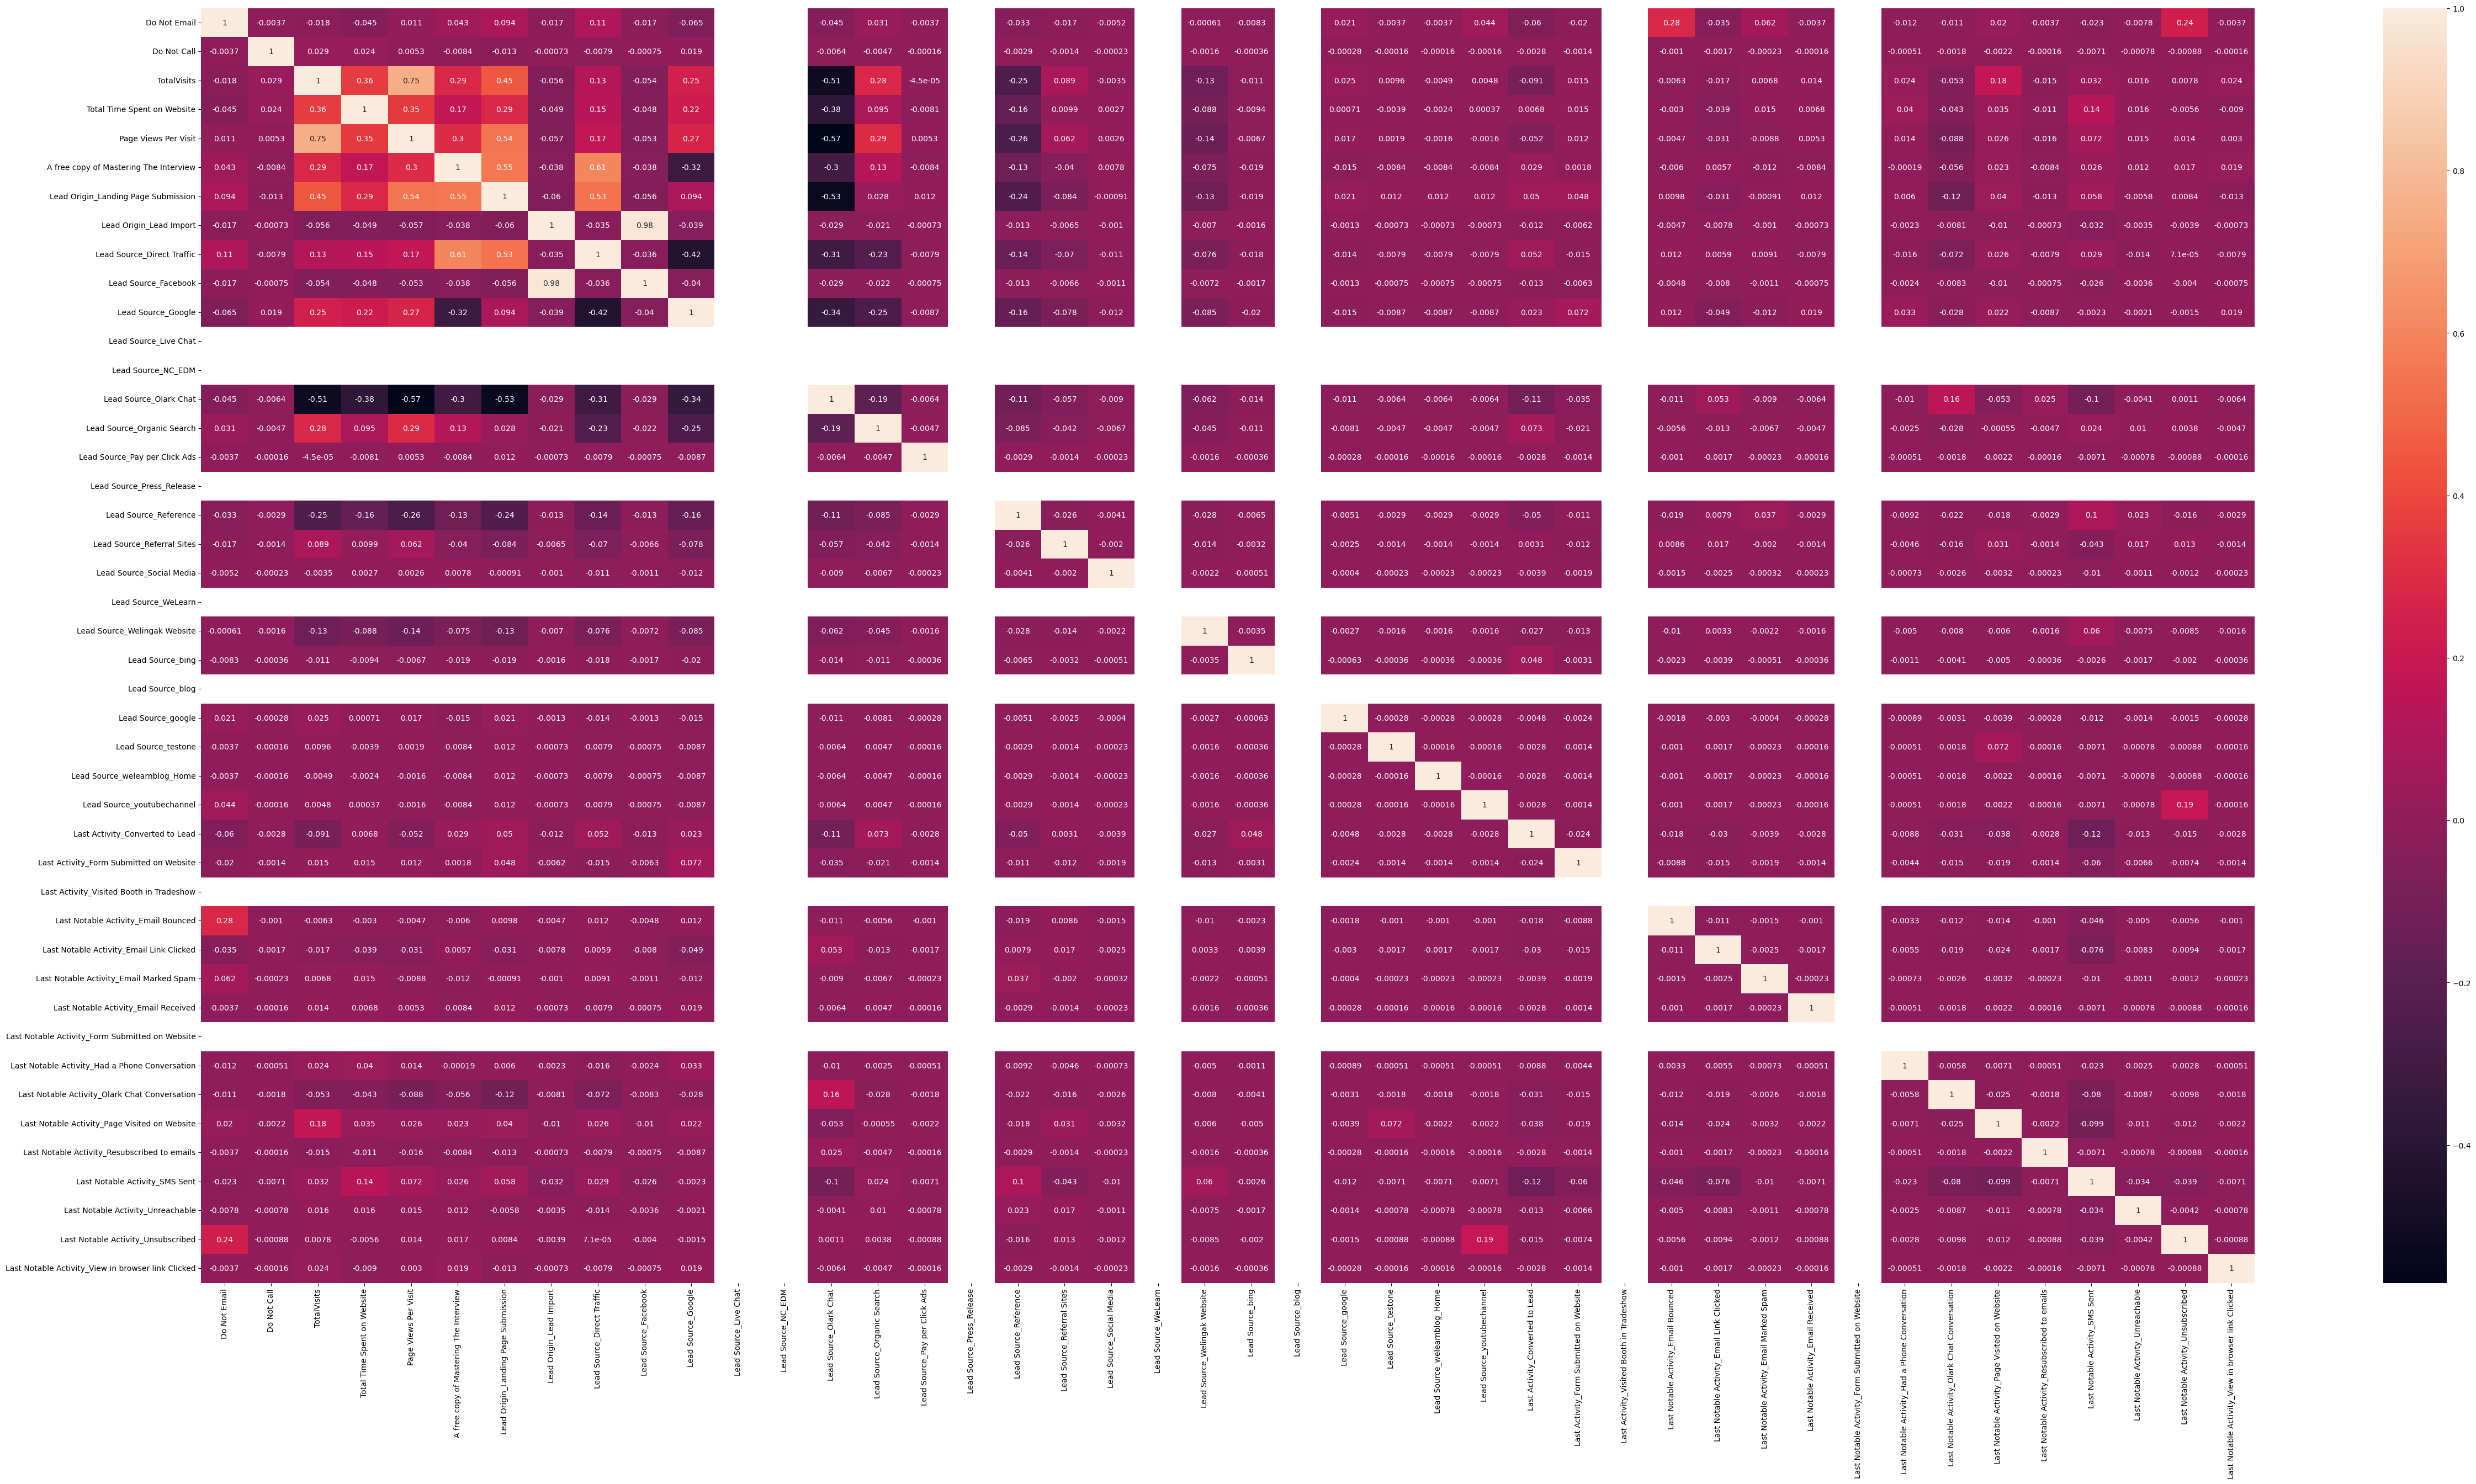

In [1436]:
plt.figure(figsize = (60,30))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

# Model Building

In [1437]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6162
Model:                            GLM   Df Residuals:                     6124
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2756.4
Date:                Thu, 30 Nov 2023   Deviance:                       5512.8
Time:                        11:44:59   Pearson chi2:                 6.23e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3463
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                 -0.8163      1.538     -0.531      0.595      -3.830       2.197
Do Not Email                                          -1.7868      0.196     -9.097      0.000      -2.172      -1.402
Do Not Call                                           21.1650   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
TotalVisits                                            1.4526      0.259      5.609      0.000       0.945       1.960
Total Time Spent on Website                            4.6555      0.166     28.114      0.000       4.331       4.980
Page Views Per Visit                                  -0.8904      0.253     -3.522      0.000      -1.386      -0.395
A free copy of Mastering The Interview                -0.0880      0.105     -0.837      0.403      -0.294       0.118
Lead Origin_Landing Page Submission                    0.0527      0.104      0.508      0.612      -0.151       0.256
Lead Origin_Lead Import                               24.0021   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Direct Traffic                            -1.7921      1.542     -1.162      0.245      -4.815       1.231
Lead Source_Facebook                                 -24.2926   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Lead Source_Google                                    -1.4910      1.540     -0.968      0.333      -4.510       1.528
Lead Source_Live Chat                               2.447e-09   3.39e-06      0.001      0.999   -6.65e-06    6.65e-06
Lead Source_NC_EDM                                 -2.641e-09   4.74e-06     -0.001      1.000   -9.29e-06    9.28e-06
Lead Source_Olark Chat                                -0.5853      1.539     -0.380      0.704      -3.602       2.431
Lead Source_Organic Search                            -1.5124      1.543     -0.980      0.327      -4.537       1.512
Lead Source_Pay per Click Ads                        -22.0599   4.82e+04     -0.000      1.000   -9.45e+04    9.44e+04
Lead Source_Press_Release                           4.729e-10   6.56e-07      0.001      0.999   -1.29e-06    1.29e-06
Lead Source_Reference                                  2.7197      1.552      1.753      0.080      -0.322       5.761
Lead Source_Referral Sites                            -1.8835      1.569     -1.201      0.230      -4.958       1.191
Lead Source_Social Media                              -0.3003      2.172     -0.138      0.890      -4.557       3.957
Lead Source_WeLearn                                 4.342e-10   7.46e-07      0.001      1.000   -1.46e-06    1.46e-06
Lead Source_Welingak Website                           5.0599      1.842      2.747      0.006       1.449  

# Feature Selection Using RFE

In [1438]:
logreg = LogisticRegression()
rfe = RFE(estimator=logreg,n_features_to_select=19)
rfe = rfe.fit(X_train, y_train)

In [1439]:
rfe.support_

array([ True, False,  True,  True,  True, False, False, False,  True,
       False,  True, False, False, False,  True, False, False,  True,
        True, False, False,  True, False, False,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False,  True,  True,  True,  True, False])

In [1440]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 14),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 17),
 ('Lead Origin_Landing Page Submission', False, 19),
 ('Lead Origin_Lead Import', False, 9),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 10),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 20),
 ('Lead Source_NC_EDM', False, 21),
 ('Lead Source_Olark Chat', False, 16),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 13),
 ('Lead Source_Press_Release', False, 22),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 18),
 ('Lead Source_WeLearn', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 5),
 ('Lead Source_blog', False, 23),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone',

In [1441]:
col = X_train.columns[rfe.support_]

In [1442]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6162
Model:                            GLM   Df Residuals:                     6142
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2766.8
Date:                Thu, 30 Nov 2023   Deviance:                       5533.5
Time:                        11:45:01   Pearson chi2:                 6.27e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3441
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.4306      0.074    -19.429      0.000      -1.575      -1.286
Do Not Email                                      -1.6725      0.183     -9.122      0.000      -2.032      -1.313
TotalVisits                                        1.3463      0.248      5.435      0.000       0.861       1.832
Total Time Spent on Website                        4.6436      0.165     28.167      0.000       4.320       4.967
Page Views Per Visit                              -0.8515      0.243     -3.511      0.000      -1.327      -0.376
Lead Source_Direct Traffic                        -1.2058      0.132     -9.155      0.000      -1.464      -0.948
Lead Source_Google                                -0.8586      0.129     -6.663      0.000      -1.111      -0.606
Lead Source_Organic Search                        -0.9077      0.162     -5.586      0.000      -1.226      -0.589
Lead Source_Reference                              3.2986      0.221     14.896      0.000       2.865       3.733
Lead Source_Referral Sites                        -1.2729      0.331     -3.843      0.000      -1.922      -0.624
Lead Source_Welingak Website                       5.6292      1.016      5.540      0.000       3.638       7.621
Lead Source_google                               -22.4031   2.36e+04     -0.001      0.999   -4.63e+04    4.62e+04
Last Activity_Converted to Lead                   -0.8445      0.206     -4.108      0.000      -1.247      -0.442
Last Notable Activity_Email Marked Spam           22.4618   3.39e+04      0.001      0.999   -6.65e+04    6.66e+04
Last Notable Activity_Had a Phone Conversation     2.8559      1.126      2.536      0.011       0.649       5.063
Last Notable Activity_Olark Chat Conversation     -1.5319      0.347     -4.411      0.000      -2.213      -0.851
Last Notable Activity_Resubscribed to emails      23.9967   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Notable Activity_SMS Sent                     1.7118      0.079     21.799      0.000       1.558       1.866
Last Notable Activity_Unreachable                  1.7040      0.538      3.165      0.002       0.649       2.759
Last Notable Activity_Unsubscribed                 1.0566      0.573      1.845      0.065      -0.066       2.179
==================================================================================================================
"""

In [1443]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

653     0.092822
626     0.018347
5163    0.178739
8113    0.866227
425     0.021699
4829    0.126325
8587    0.857384
4682    0.396358
141     0.135459
5110    0.098027
dtype: float64

In [1444]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09282151, 0.01834694, 0.17873914, 0.86622678, 0.02169878,
       0.12632517, 0.85738393, 0.3963575 , 0.1354591 , 0.09802662])

In [1445]:
y_train_pred_final = pd.DataFrame({'converted':y_train.values, 'converted_prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

converted  converted_prob    ID
0          0        0.092822   653
1          0        0.018347   626
2          0        0.178739  5163
3          1        0.866227  8113
4          0        0.021699   425

In [1446]:
y_train_pred_final['predicted'] = y_train_pred_final.converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

converted  converted_prob    ID  predicted
0          0        0.092822   653          0
1          0        0.018347   626          0
2          0        0.178739  5163          0
3          1        0.866227  8113          1
4          0        0.021699   425          0

In [1447]:
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
print(confusion)

[[3403  468]
 [ 763 1528]]


In [1448]:
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.8002271989613762

In [1449]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                             Page Views Per Visit  7.18
1                                      TotalVisits  5.86
5                               Lead Source_Google  3.64
4                       Lead Source_Direct Traffic  3.08
6                       Lead Source_Organic Search  2.48
2                      Total Time Spent on Website  2.30
16                  Last Notable Activity_SMS Sent  1.38
0                                     Do Not Email  1.18
11                 Last Activity_Converted to Lead  1.17
8                       Lead Source_Referral Sites  1.13
18              Last Notable Activity_Unsubscribed  1.07
7                            Lead Source_Reference  1.06
9                     Lead Source_Welingak Website  1.02
10                              Lead Source_google  1.01
12         Last Notable Activity_Email Marked Spam  1.01
13  Last Notable Activity_Had a Phone Conversation  1.01
14   Last Notable Activity_Olark Chat Conversation  1.01
17               Last Notable Activity_Unreachable  1.01
15    Last Notable Activity_Resubscribed to emails  1.00

In [1450]:
col = col.drop('Page Views Per Visit', 1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [1451]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6162
Model:                            GLM   Df Residuals:                     6143
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2773.0
Date:                Thu, 30 Nov 2023   Deviance:                       5546.0
Time:                        11:45:02   Pearson chi2:                 6.27e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3428
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.4344      0.074    -19.476      0.000      -1.579      -1.290
Do Not Email                                      -1.6691      0.183     -9.118      0.000      -2.028      -1.310
TotalVisits                                        0.9097      0.215      4.231      0.000       0.488       1.331
Total Time Spent on Website                        4.6379      0.165     28.162      0.000       4.315       4.961
Lead Source_Direct Traffic                        -1.3717      0.124    -11.104      0.000      -1.614      -1.130
Lead Source_Google                                -1.0306      0.120     -8.609      0.000      -1.265      -0.796
Lead Source_Organic Search                        -1.1174      0.151     -7.381      0.000      -1.414      -0.821
Lead Source_Reference                              3.3038      0.221     14.921      0.000       2.870       3.738
Lead Source_Referral Sites                        -1.4497      0.329     -4.405      0.000      -2.095      -0.805
Lead Source_Welingak Website                       5.6322      1.016      5.543      0.000       3.641       7.624
Lead Source_google                               -22.5561   2.38e+04     -0.001      0.999   -4.67e+04    4.66e+04
Last Activity_Converted to Lead                   -0.7930      0.205     -3.868      0.000      -1.195      -0.391
Last Notable Activity_Email Marked Spam           22.5477   3.39e+04      0.001      0.999   -6.65e+04    6.66e+04
Last Notable Activity_Had a Phone Conversation     2.8401      1.123      2.529      0.011       0.639       5.041
Last Notable Activity_Olark Chat Conversation     -1.5046      0.346     -4.344      0.000      -2.183      -0.826
Last Notable Activity_Resubscribed to emails      24.0004   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Notable Activity_SMS Sent                     1.6901      0.078     21.651      0.000       1.537       1.843
Last Notable Activity_Unreachable                  1.7042      0.541      3.148      0.002       0.643       2.765
Last Notable Activity_Unsubscribed                 1.0220      0.575      1.776      0.076      -0.106       2.150
==================================================================================================================
"""

In [1452]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [1453]:
y_train_pred[:10]

array([0.10253635, 0.01722143, 0.20178343, 0.8663937 , 0.0252176 ,
       0.11396085, 0.85058413, 0.49115278, 0.11677982, 0.09217848])

In [1454]:
y_train_pred_final['converted_prob'] = y_train_pred

In [1455]:
y_train_pred_final['predicted'] = y_train_pred_final.converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

converted  converted_prob    ID  predicted
0          0        0.102536   653          0
1          0        0.017221   626          0
2          0        0.201783  5163          0
3          1        0.866394  8113          1
4          0        0.025218   425          0

In [1456]:
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.7977929243752029

In [1457]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                                      TotalVisits  4.23
4                               Lead Source_Google  2.95
3                       Lead Source_Direct Traffic  2.54
2                      Total Time Spent on Website  2.30
5                       Lead Source_Organic Search  2.08
15                  Last Notable Activity_SMS Sent  1.37
0                                     Do Not Email  1.18
10                 Last Activity_Converted to Lead  1.16
7                       Lead Source_Referral Sites  1.10
17              Last Notable Activity_Unsubscribed  1.07
6                            Lead Source_Reference  1.06
8                     Lead Source_Welingak Website  1.02
11         Last Notable Activity_Email Marked Spam  1.01
12  Last Notable Activity_Had a Phone Conversation  1.01
13   Last Notable Activity_Olark Chat Conversation  1.01
16               Last Notable Activity_Unreachable  1.01
9                               Lead Source_google  1.01
14    Last Notable Activity_Resubscribed to emails  1.00

In [1458]:
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.7977929243752029

In [1459]:
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
confusion

array([[3389,  482],
       [ 764, 1527]], dtype=int64)

In [1460]:
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.7977929243752029

In [1461]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1462]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6665211697948494

In [1463]:
# Let us calculate specificity
TN / float(TN+FP)

0.8754843709635753

In [1464]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1245156290364247


In [1465]:
# positive predictive value 
print (TP / float(TP+FP))

0.7600796416127427


In [1466]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8160366000481579


In [1467]:
col = col.drop('TotalVisits', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

In [1468]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6162
Model:                            GLM   Df Residuals:                     6144
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2781.9
Date:                Thu, 30 Nov 2023   Deviance:                       5563.8
Time:                        11:45:03   Pearson chi2:                 6.27e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3409
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.4070      0.073    -19.292      0.000      -1.550      -1.264
Do Not Email                                      -1.6958      0.182     -9.305      0.000      -2.053      -1.339
Total Time Spent on Website                        4.6786      0.164     28.462      0.000       4.356       5.001
Lead Source_Direct Traffic                        -1.1346      0.109    -10.448      0.000      -1.347      -0.922
Lead Source_Google                                -0.7770      0.102     -7.603      0.000      -0.977      -0.577
Lead Source_Organic Search                        -0.7816      0.127     -6.136      0.000      -1.031      -0.532
Lead Source_Reference                              3.2836      0.221     14.844      0.000       2.850       3.717
Lead Source_Referral Sites                        -1.1206      0.320     -3.505      0.000      -1.747      -0.494
Lead Source_Welingak Website                       5.6143      1.016      5.526      0.000       3.623       7.605
Lead Source_google                               -22.1289    2.4e+04     -0.001      0.999    -4.7e+04    4.69e+04
Last Activity_Converted to Lead                   -0.9576      0.201     -4.757      0.000      -1.352      -0.563
Last Notable Activity_Email Marked Spam           22.7254   3.38e+04      0.001      0.999   -6.62e+04    6.63e+04
Last Notable Activity_Had a Phone Conversation     2.7994      1.117      2.507      0.012       0.611       4.988
Last Notable Activity_Olark Chat Conversation     -1.4447      0.340     -4.249      0.000      -2.111      -0.778
Last Notable Activity_Resubscribed to emails      23.9731   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Notable Activity_SMS Sent                     1.6774      0.078     21.539      0.000       1.525       1.830
Last Notable Activity_Unreachable                  1.7572      0.543      3.235      0.001       0.692       2.822
Last Notable Activity_Unsubscribed                 1.0469      0.578      1.812      0.070      -0.086       2.179
==================================================================================================================
"""

In [1469]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [1470]:
y_train_pred[:10]

array([0.11017445, 0.02089041, 0.20512122, 0.86721834, 0.02493724,
       0.12152312, 0.86856368, 0.41936604, 0.11078155, 0.1127483 ])

In [1471]:
y_train_pred_final['converted_prob'] = y_train_pred

In [1472]:
y_train_pred_final['predicted'] = y_train_pred_final.converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

converted  converted_prob    ID  predicted
0          0        0.110174   653          0
1          0        0.020890   626          0
2          0        0.205121  5163          0
3          1        0.867218  8113          1
4          0        0.024937   425          0

In [1473]:
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.7964946445959105

In [1474]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
1                      Total Time Spent on Website  2.27
3                               Lead Source_Google  1.70
2                       Lead Source_Direct Traffic  1.62
14                  Last Notable Activity_SMS Sent  1.37
4                       Lead Source_Organic Search  1.28
0                                     Do Not Email  1.18
9                  Last Activity_Converted to Lead  1.10
16              Last Notable Activity_Unsubscribed  1.07
5                            Lead Source_Reference  1.06
7                     Lead Source_Welingak Website  1.02
6                       Lead Source_Referral Sites  1.02
10         Last Notable Activity_Email Marked Spam  1.01
12   Last Notable Activity_Olark Chat Conversation  1.01
15               Last Notable Activity_Unreachable  1.01
11  Last Notable Activity_Had a Phone Conversation  1.00
13    Last Notable Activity_Resubscribed to emails  1.00
8                               Lead Source_google  1.00

In [1475]:
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.7964946445959105

In [1476]:
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.predicted )
confusion

array([[3400,  471],
       [ 783, 1508]], dtype=int64)

In [1477]:
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.7964946445959105

In [1478]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1479]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6582278481012658

In [1480]:
# Let us calculate specificity
TN / float(TN+FP)

0.8783260139498837

In [1481]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12167398605011624


In [1482]:
# positive predictive value 
print (TP / float(TP+FP))

0.7620010106114199


In [1483]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8128137700215157


In [1484]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1485]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.converted, y_train_pred_final.converted_prob, drop_intermediate = False )

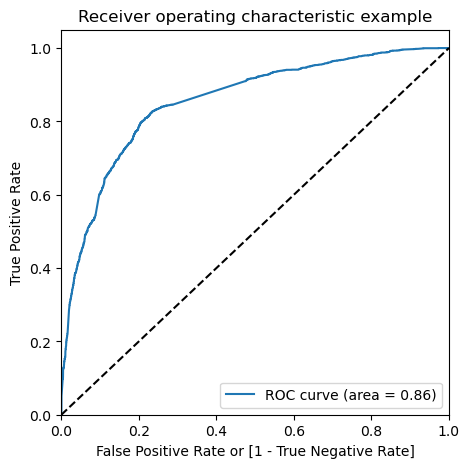

In [1486]:
draw_roc(y_train_pred_final.converted, y_train_pred_final.converted_prob)

In [1487]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

converted  converted_prob    ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.110174   653          0    1    1    0    0    0    0   
1          0        0.020890   626          0    1    0    0    0    0    0   
2          0        0.205121  5163          0    1    1    1    0    0    0   
3          1        0.867218  8113          1    1    1    1    1    1    1   
4          0        0.024937   425          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    1    1    1    0  
4    0    0    0    0

In [1488]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.371795  1.000000  0.000000
0.1   0.1  0.500000  0.979921  0.215965
0.2   0.2  0.763875  0.845482  0.715577
0.3   0.3  0.790166  0.813182  0.776544
0.4   0.4  0.792762  0.742471  0.822526
0.5   0.5  0.796495  0.658228  0.878326
0.6   0.6  0.774748  0.519424  0.925859
0.7   0.7  0.759656  0.433435  0.952725
0.8   0.8  0.740344  0.352248  0.970034
0.9   0.9  0.688088  0.180271  0.988633


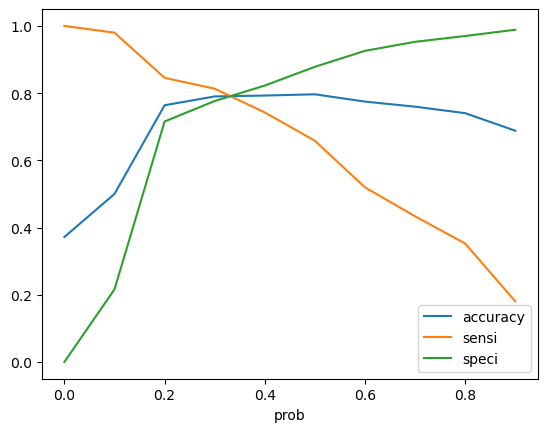

In [1489]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [1490]:
y_train_pred_final['final_predicted'] = y_train_pred_final.converted_prob.map( lambda x: 1 if x > 0.32 else 0)

y_train_pred_final.head()

converted  converted_prob    ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          0        0.110174   653          0    1    1    0    0    0    0   
1          0        0.020890   626          0    1    0    0    0    0    0   
2          0        0.205121  5163          0    1    1    1    0    0    0   
3          1        0.867218  8113          1    1    1    1    1    1    1   
4          0        0.024937   425          0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    0    0    0    0                0  
2    0    0    0    0                0  
3    1    1    1    0                1  
4    0    0    0    0                0

In [1491]:
confusion = metrics.confusion_matrix(y_train_pred_final.converted, y_train_pred_final.final_predicted )
confusion

array([[3054,  817],
       [ 455, 1836]], dtype=int64)

In [1492]:
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.7964946445959105

In [1493]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1494]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8013967699694456

In [1495]:
# Let us calculate specificity
TN / float(TN+FP)

0.7889434254714544

In [1496]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.2110565745285456


In [1497]:
# positive predictive value precision
print (TP / float(TP+FP))

0.6920467395401433


In [1498]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8703334283271588


In [1499]:
y_train_pred_final.converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6157    0
 6158    0
 6159    1
 6160    0
 6161    0
 Name: converted, Length: 6162, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6157    0
 6158    0
 6159    1
 6160    0
 6161    0
 Name: predicted, Length: 6162, dtype: int64)

In [1500]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.converted, y_train_pred_final.converted_prob)

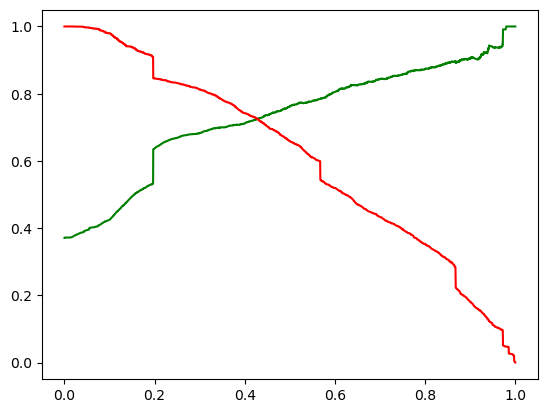

In [1501]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making predictions on the test set

In [1502]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
3235             0            0     0.307692                     0.053257   
793              0            0     0.000000                     0.000000   
7250             0            0     0.307692                     0.359155   
5689             1            0     0.846154                     0.014525   
1615             0            0     0.000000                     0.000000   

      Page Views Per Visit  A free copy of Mastering The Interview  \
3235               0.50000                                       1   
793                0.00000                                       0   
7250               0.50000                                       0   
5689               0.45875                                       1   
1615               0.00000                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Import  \
3235                                    1                        0   
793                                     0                        0   
7250                                    0                        0   
5689                                    0                        0   
1615                                    0                        0   

      Lead Source_Direct Traffic  Lead Source_Facebook  ...  \
3235                           1                     0  ...   
793                            0                     0  ...   
7250                           0                     0  ...   
5689                           0                     0  ...   
1615                           0                     0  ...   

      Last Notable Activity_Email Received  \
3235                                     0   
793                                      0   
7250                                     0   
5689                                     0   
1615                                     0   

      Last Notable Activity_Form Submitted on Website  \
3235                                                0   
793                                                 0   
7250                                                0   
5689                                                0   
1615                                                0   

      Last Notable Activity_Had a Phone Conversation  \
3235                                               0   
793                                                0   
7250                                               0   
5689                                               0   
1615                                               0   

      Last Notable Activity_Olark Chat Conversation  \
3235                                              0   
793                                               0   
7250                                              0   
5689                                              0   
1615                                              0   

      Last Notable Activity_Page Visited on Website  \
3235                                              0   
793                                               0   
7250                                              0   
5689                                              1   
1615                                              0   

      Last Notable Activity_Resubscribed to emails  \
3235                                             0   
793                                              0   
7250                                             0   
5689                                             0   
1615                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3235                               1                                  0   
793                                0                                  0   
7250                               1                                  0   
5689                               0                                  0   
161

In [1503]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  Lead Source_Direct Traffic  \
3235             0                     0.053257                           1   
793              0                     0.000000                           0   
7250             0                     0.359155                           0   
5689             1                     0.014525                           0   
1615             0                     0.000000                           0   

      Lead Source_Google  Lead Source_Organic Search  Lead Source_Reference  \
3235                   0                           0                      0   
793                    0                           0                      0   
7250                   0                           1                      0   
5689                   0                           1                      0   
1615                   0                           0                      0   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
3235                           0                             0   
793                            0                             0   
7250                           0                             0   
5689                           0                             0   
1615                           0                             0   

      Lead Source_google  Last Activity_Converted to Lead  \
3235                   0                                0   
793                    0                                0   
7250                   0                                0   
5689                   0                                0   
1615                   0                                0   

      Last Notable Activity_Email Marked Spam  \
3235                                        0   
793                                         0   
7250                                        0   
5689                                        0   
1615                                        0   

      Last Notable Activity_Had a Phone Conversation  \
3235                                               0   
793                                                0   
7250                                               0   
5689                                               0   
1615                                               0   

      Last Notable Activity_Olark Chat Conversation  \
3235                                              0   
793                                               0   
7250                                              0   
5689                                              0   
1615                                              0   

      Last Notable Activity_Resubscribed to emails  \
3235                                             0   
793                                              0   
7250                                             0   
5689                                             0   
1615                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3235                               1                                  0   
793                                0                                  0   
7250                               1                                  0   
5689                               0                                  0   
1615                               1                                  0   

      Last Notable Activity_Unsubscribed  
3235                                   0  
793                                    0  
7250                                   0  
5689                                   0  
1615                                   0

In [1504]:
X_test_sm = sm.add_constant(X_test)

In [1505]:
y_test_pred = res.predict(X_test_sm).values.reshape(-1)

In [1506]:
y_test_pred_final = pd.DataFrame({'converted':y_test.values, 'converted_prob':y_test_pred})
y_test_pred_final['ID'] = y_test.index
y_test_pred_final.head()

converted  converted_prob    ID
0          0        0.350911  3235
1          0        0.196710   793
2          1        0.762997  7250
3          0        0.021532  5689
4          1        0.567199  1615

In [1510]:
y_test_pred_final['final_predicted'] = y_test_pred_final.converted_prob.map(lambda x: 1 if x > 0.32 else 0)

In [1511]:
y_test_pred_final.head()

converted  converted_prob    ID  final_predicted
0          0        0.350911  3235                1
1          0        0.196710   793                0
2          1        0.762997  7250                1
3          0        0.021532  5689                0
4          1        0.567199  1615                1

In [1513]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.converted, y_test_pred_final.final_predicted )
confusion2

array([[1292,  321],
       [ 191,  838]], dtype=int64)

In [1514]:
metrics.accuracy_score(y_train_pred_final.converted, y_train_pred_final.predicted)

0.7964946445959105

In [1517]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1518]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.814382896015549

In [1519]:
# Let us calculate specificity
TN / float(TN+FP)

0.800991940483571

In [1520]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19900805951642903


In [1521]:
# positive predictive value precision
print (TP / float(TP+FP))

0.723037100949094


In [1522]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8712070128118679
